In [1]:
# here we want to check whether our simulation model gives in long-term the same frequency of cars in cells 
# and the same minimum wage
# as well as the same total wage

# since Pr is defined per each time interval (smoothed over intervals maybe???)
# we can 

In [ ]:
# while it is running, check for rw that in long term within one Pr value both objective and car distribution converges
# // for different Pr values what? and how it depends on the current car distribution? does the final A depend on initial p?
# // maybe check heuristically whether A depends on initial distribution or not. if not, it just up to learning Pr
# how does it span across different pr?

In [1]:
# first check how realistic are convergence of RW
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os
sys.path.append("..")
sys.path.append(os.path.join("../src/", "Solvers"))
sys.path.append(os.path.join("../src/", "Expert"))
from RwSolver import *
from Experiment import *
from Analyzer import *

# Convergence of Pr

In [123]:
df = Analyzer("rw_study").df
df.columns

Index(['A_diff', 'Pr estimation', '_id', 'actions', 'beta', 'dataset_id',
       'dataset_path', 'dataset_type', 'days', 'debug', 'delta',
       'dispatching_time', 'dummy_data_param', 'expected_objective',
       'expected_objective2', 'iterations', 'loading_time',
       'long_term_policy_debug_time', 'mean_order_response_rates',
       'min_income', 'min_value_estimation', 'mode', 'n', 'number_of_cars',
       'number_of_orders', 'objective', 'order_distr', 'order_response_rates',
       'orders_density', 'p_conv', 'p_iter_time', 'p_var', 'policy_opt_time',
       'policy_training_init_time', 'pr_conv', 'pr_conv_time',
       'predicted_busy_vs_real', 'predicted_vs_real',
       'prediction_accuracy_time', 'rewards', 'set_true_pr', 'solver', 'tag',
       'time_periods', 'time_periods_per_hour', 'train_test_split',
       'trained_model_id', 'wc'],
      dtype='object')

In [124]:
df

,A_diff,Pr estimation,_id,actions,beta,dataset_id,dataset_path,dataset_type,days,debug,...,prediction_accuracy_time,rewards,set_true_pr,solver,tag,time_periods,time_periods_per_hour,train_test_split,trained_model_id,wc
0,"[0.025429641497014224, 0.039634135119448126, 0...",0.023333,5d8dca83cb6697c5b8d2110f,"[31, 28, 29, 29, 28, 26, 24, 26, 26, 28, 25, 2...",0.01,5ca37fa0-e9f2-4048-b62e-d24769c6e16e,/Users/au624601/PhD/data/macaoFiles/rw_study/5...,grid,100.0,1.0,...,0.032079,"[7.656912265849815, 0.014271578730530976, -0.3...",0.0,Rw,rw_study,4.0,2.0,0.5,607ff5a7-fd98-42b0-b695-7547c9d3c466,0.3
1,"[0.023245392842761718, 0.03706412902461871, 0....",0.021422,5d8dca83cb6697c5b8d2110f,"[31, 28, 29, 29, 28, 26, 24, 26, 26, 28, 25, 2...",0.01,5ca37fa0-e9f2-4048-b62e-d24769c6e16e,/Users/au624601/PhD/data/macaoFiles/rw_study/5...,grid,100.0,1.0,...,0.031660,"[7.656912265849815, 0.014271578730530976, -0.3...",0.0,Rw,rw_study,4.0,2.0,0.5,f8c78ff6-9601-45a1-ba99-dbd6a9ab70e7,0.3
2,NaN,NaN,5d8dca83cb6697c5b8d2110f,"[23, 24, 23, 24, 24, 24, 20, 22, 20, 22, 22, 2...",NaN,5ca37fa0-e9f2-4048-b62e-d24769c6e16e,/Users/au624601/PhD/data/macaoFiles/rw_study/5...,grid,100.0,NaN,...,NaN,"[7.656912265849815, 0.014271578730530976, -0.3...",NaN,Diff,rw_study,4.0,2.0,0.5,fb402bcd-1aea-4586-bc3c-2294559b8aec,0.3


Text(0.5, 1.0, 'Convergence of Pr estimation')

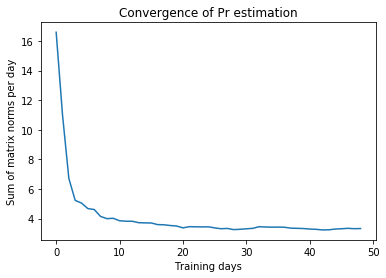

In [118]:
plt.plot(df.iloc[0]['pr_conv'])
plt.xlabel("Training days")
plt.ylabel("Sum of matrix norms per day")
plt.title("Convergence of Pr estimation")

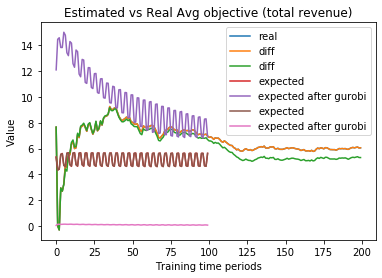

In [129]:
plt.plot(df.iloc[0]['rewards'], label="real")
plt.plot(df.iloc[1]['rewards'], label="diff")
plt.plot(df.iloc[2]['rewards'], label="diff")
plt.plot(df.iloc[0]['expected_objective'], label="expected")
plt.plot(df.iloc[0]['expected_objective2'], label="expected after gurobi")
plt.plot(df.iloc[1]['expected_objective'], label="expected")
plt.plot(df.iloc[1]['expected_objective2'], label="expected after gurobi")
plt.xlabel("Training time periods")
plt.ylabel("Value")
plt.title("Estimated vs Real Avg objective (total revenue)")
# plt.ylim((2,5))
plt.legend()

Text(0.5, 1.0, 'Covergence of avg car distribution to estimated car distribution')

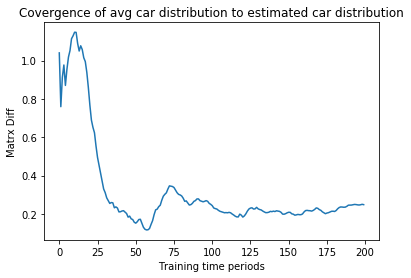

In [120]:
plt.plot(df.iloc[0]['predicted_vs_real'])
plt.xlabel("Training time periods")
plt.ylabel("Matrx Diff")
plt.title("Covergence of avg car distribution to estimated car distribution")
# plt.ylim((0,0.1))
# should converge to 0, with an error up to Pr estimation

Text(0.5, 1.0, 'Covergence of p_busy towards estimated')

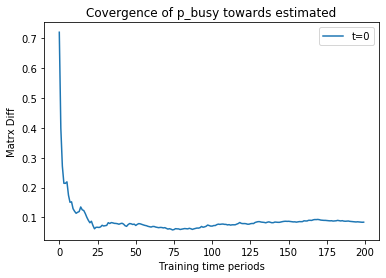

In [121]:
plt.plot(df.iloc[0]['predicted_busy_vs_real'], label="t=0")
# plt.plot(df.iloc[0]['predicted_busy_vs_real2'], label="t=1")
plt.legend()
plt.xlabel("Training time periods")
plt.ylabel("Matrx Diff")
plt.title("Covergence of p_busy towards estimated")

Text(0.5, 1.0, 'Covergence of A')

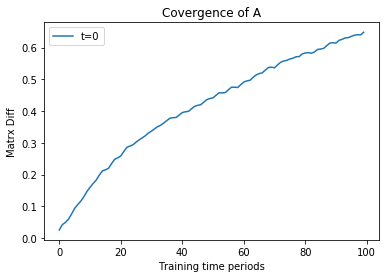

In [122]:
plt.plot(df.iloc[0]['A_diff'], label="t=0")
plt.legend()
plt.xlabel("Training time periods")
plt.ylabel("Matrx Diff")
plt.title("Covergence of A")

Text(0.5, 1.0, 'Covergence of p towards average')

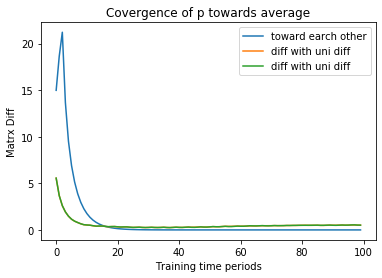

In [130]:
plt.plot(df.iloc[0]['p_conv'], label="toward earch other")
plt.plot(df.iloc[0]['p_var'], label="diff with uni diff")
plt.plot(df.iloc[1]['p_var'], label="diff with uni diff")
plt.legend()
plt.xlabel("Training time periods")
plt.ylabel("Matrx Diff")
plt.title("Covergence of p towards average")

# Dependency of cars distribution on initial cars distribution

In [15]:
# load tidy grid data
scriptname = "rw_study"
with open(os.path.join('..','dags',scriptname + '.json'),'r') as f:
    params = json.load(f)
params['tag'] = scriptname
experiment = Experiment(params)

2019-09-14 20:23:12,447 INFO 100053222 MainThread: 
============================ INIT EXPERIMENT ===============================



In [16]:
q = {"tag": experiment.tag, "mode": "Train", "solver": "Rw"}
total_datasets = experiment.db.solution.count_documents(q)
if (total_datasets == 0):
    raise Exception("No learned models found for the tag")

d = next(experiment.db.solution.find(q))
all_params = d
del all_params["_id"]
all_params['mode'] = "Test"

In [17]:
solver = RwSolver(**all_params)

In [12]:
p = solver.run()

In [11]:
# take the last state of testing
solver.env

In [14]:
context = np.zeros((len(solver.env.world),1)) # drivers' distribution


In [ ]:
solver.get_dispatch_action(env, None, context)